In [1]:
import cv2 #to preprocess images(open cv)
import os #to access file directories
import numpy as np # to deal with multidimensional matrices
from random import shuffle 
from tqdm import tqdm
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf 
import tflearn 
from tflearn.layers.conv import conv_2d, max_pool_2d 
from tflearn.layers.core import input_data, dropout, fully_connected 
from tflearn.layers.estimator import regression 

'''Setting up the env'''
  

IMG_SIZE = 150
LR = 1e-3

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [2]:
DIR = 'D:\\thesis_codes\\7_Spectrogram_2DCNN\\OUT_RAV\\specs\\neutral\\'

<ipython-input-19-55b7d4a10991>:3: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr)


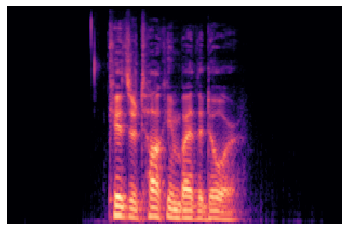

In [19]:
i = "D:/AAA_video_course/Programming/dataset/Actor_01/03-01-01-01-01-01-01.wav"
x, sr = librosa.load(i, sr=48000)
mel_spect = librosa.feature.melspectrogram(x, sr=sr)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', x_axis='time');
plt.axis('off')
plt.margins(x=0)
plt.savefig(DIR+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)

In [3]:
dir_calm= 'D:\\thesis_codes\\7_Spectrogram_2DCNN\\OUT_RAV\\specs\\calm\\'        
dir_angry= 'D:\\thesis_codes\\7_Spectrogram_2DCNN\\OUT_RAV\\specs\\angry\\'        
dir_disgust = 'D:\\thesis_codes\\7_Spectrogram_2DCNN\\OUT_RAV\\specs\\disgust\\'
dir_fear = 'D:\\thesis_codes\\7_Spectrogram_2DCNN\\OUT_RAV\\specs\\fear\\'
dir_happy = 'D:\\thesis_codes\\7_Spectrogram_2DCNN\\OUT_RAV\\specs\\happy\\' 
dir_neutral = 'D:\\thesis_codes\\7_Spectrogram_2DCNN\\OUT_RAV\\specs\\neutral\\'
dir_sad = 'D:\\thesis_codes\\7_Spectrogram_2DCNN\\OUT_RAV\\specs\\sad\\'
dir_surprise = 'D:\\thesis_codes\\7_Spectrogram_2DCNN\\OUT_RAV\\specs\\surprise\\'

In [4]:
dir_fear

'D:\\thesis_codes\\7_Spectrogram_2DCNN\\OUT_RAV\\specs\\fear\\'

In [25]:
ccc = '03-01-01-01-01-01-01.wav'
ccc.split('.')[0]
part = ccc.split("-")
part

['03', '01', '01', '01', '01', '01', '01.wav']

In [5]:
"""#RAVDESS
import os
import glob
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
for i in glob.glob("D:/AAA_video_course/Programming/dataset_song/*/*.wav"):
        #کاهش نویز و حذف صدای خالی - کتابخانه ها برای توضیح روش بررسی شود 
        
        x, sr = librosa.load(i, sr=48000)
        x, index = librosa.effects.trim(x)        #top_db=60      
        mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
        mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
        librosa.display.specshow(mel_spect, y_axis='mel', fmax=20000, x_axis='time');
        plt.axis('off')
        plt.margins(x=0)
          
        file_name=os.path.basename(i)
        #part = file_name.split('.')[0]
        part = file_name.split("-")
        if part[2] == '01':
            plt.savefig(dir_neutral+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif part[2] == '02':
            plt.savefig(dir_calm+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif part[2] == '03':
            plt.savefig(dir_happy+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif part[2] == '04':
            plt.savefig(dir_sad+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif part[2] == '05':
            plt.savefig(dir_angry+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif part[2] == '06':
            plt.savefig(dir_fear+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif part[2] == '07':
            plt.savefig(dir_disgust+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
        elif part[2] == '08':
            plt.savefig(dir_surprise+os.path.basename(i)+'.jpg',dpi = 120,bbox_inches='tight', pad_inches = 0)
            plt.close()
"""

<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[6.1035156e-05 6.1035156e-05 6.1035156e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-i

<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[-3.9672852e-04 -5.7983398e-04 -7.3242188e-04 ... -9.1552734e-05
 -1.2207031e-04 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[0.00045776 0.00039673 0.00021362 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 3.0517578e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df

<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[ 0.00024414  0.00024414  0.00024414 ... -0.00015259 -0.00021362
 -0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00 -3.0517578e-05 ... -6.1035156e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[3.0517578e-05 9.1552734e-05 9.1552734e-05 ... 1.5258789e-04 3.6621094e-04
 3.9672852e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f81

<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[5.1879883e-04 5.7983398e-04 3.9672852e-04 ... 6.1035156e-05 6.1035156e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[-9.1552734e-05 -6.1035156e-05 -3.0517578e-05 ...  0.0000000e+00
 -9.1552734e-05 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[-3.6621094e-04 -3.9672852e-04 -4.2724609e-04 ...  0.0000000e+00
  0.0000000e+00  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipy

<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[0.00396729 0.00393677 0.00405884 ... 0.00073242 0.00085449 0.00094604] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[-1.7089844e-03 -1.7700195e-03 -1.5258789e-03 ... -9.1552734e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[9.1552734e-05 9.1552734e-05 9.1552734e-05 ... 3.2653809e-03 2.9602051e-03
 2.7465820e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df

<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 3.0517578e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  3.0517578e-05 ...  0.0000000e+00
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipy

<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -6.1035156e-05 ...  3.0517578e-05
  6.1035156e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[-3.0517578e-05 -6.1035156e-05 -3.0517578e-05 ...  0.0000000e+00
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100

<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[-9.1552734e-05 -9.1552734e-05 -6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  3.0517578e-05 ...  0.0000000e+00
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipy

<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  3.0517578e-05 ... -6.1035156e-05
 -3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ... -3.0517578e-04
 -3.0517578e-04 -2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[-0.00012207 -0.00012207 -0.00012207 ...  0.00048828  0.00042725
  0.00042725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5

<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  0.0000000e+00 ... -1.5258789e-04
 -1.5258789e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.1552734e-05 9.1552734e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[1.5258789e-04 1.2207031e-04 1.5258789e-04 ... 0.0000000e+00 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-i

<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[9.1552734e-05 1.5258789e-04 1.2207031e-04 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[ 5.1879883e-04  5.1879883e-04  5.1879883e-04 ...  0.0000000e+00
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[-1.2207031e-04 -9.1552734e-05 -9.1552734e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipy

<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[-3.0517578e-05 -6.1035156e-05 -3.0517578e-05 ... -2.7465820e-04
 -2.4414062e-04 -2.7465820e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[-2.4414062e-04 -2.7465820e-04 -1.8310547e-04 ... -1.5258789e-04
 -1.2207031e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -6.1035156e-05 ...  3.0517578e-05
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100

<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[ 3.0517578e-04  3.6621094e-04  3.3569336e-04 ... -4.8828125e-04
 -2.7465820e-04 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[-2.7465820e-04 -2.4414062e-04 -1.2207031e-04 ...  6.1035156e-05
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 3.0517578e-05 ... 0.0000000e+00 6.1035156e-05
 1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipy

<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 3.0517578e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[ 6.1035156e-05  9.1552734e-05  1.2207031e-04 ... -6.1035156e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[-3.0517578e-05 -6.1035156e-05 -3.0517578e-05 ... -3.0517578e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipy

<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[ 6.1035156e-05  0.0000000e+00 -1.5258789e-04 ...  0.0000000e+00
  0.0000000e+00 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  0.0000000e+00 ...  0.0000000e+00
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[ 3.0517578e-05  9.1552734e-05  1.2207031e-04 ... -9.1552734e-05
 -9.1552734e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100

<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 0.0000000e+00 ... 2.4414062e-04 2.4414062e-04
 2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  0.0000000e+00 ...  3.9672852e-04
  3.9672852e-04  3.9672852e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00167847 -0.00164795
 -0.00158691] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f81

<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.2207031e-04
 -1.2207031e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  0.0000000e+00 ... -6.1035156e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100

<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[ 9.1552734e-05  1.2207031e-04  1.2207031e-04 ... -6.1035156e-05
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.2207031e-04 1.2207031e-04
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[3.0517578e-05 6.1035156e-05 3.0517578e-05 ... 6.1035156e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-i

<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -6.1035156e-05 ... -9.1552734e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[ 1.5258789e-04  1.2207031e-04  1.2207031e-04 ... -3.0517578e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100

<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[-0.00021362 -0.00024414 -0.00021362 ... -0.00015259 -0.00018311
 -0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[1.8310547e-04 3.0517578e-04 2.7465820e-04 ... 1.5258789e-04 1.2207031e-04
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[-1.5258789e-04 -1.5258789e-04 -1.2207031e-04 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f81

<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 3.0517578e-05 ... 3.0517578e-05 6.1035156e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00 -3.0517578e-05 ...  0.0000000e+00
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 0.0000000e+00 ... 6.1035156e-05 6.1035156e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-i

<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[-0.00015259 -0.00012207 -0.00012207 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 6.1035156e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>

<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  0.0000000e+00 ...  1.8310547e-04
  1.5258789e-04  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[ 9.1552734e-05  2.4414062e-04  3.0517578e-04 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100

<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[6.1035156e-05 3.0517578e-05 3.0517578e-05 ... 9.1552734e-05 6.1035156e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[-3.0517578e-05 -6.1035156e-05 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipy

<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 6.1035156e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -6.1035156e-05 ...  3.0517578e-05
  1.2207031e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-i

<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[4.5776367e-04 2.1362305e-04 6.1035156e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -9.1552734e-05 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipython-input-5-c9f814a7b3df>:13: FutureWarning: Pass y=[ 3.0517578e-05  6.1035156e-05  3.0517578e-05 ...  0.0000000e+00
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spect = librosa.feature.melspectrogram(x, sr=sr, n_fft=1024, hop_length=100)
<ipy

In [3]:
import re 
import os

In [4]:
dicts={'01' : 'neutral', '02' : 'calm', '03' : 'happy', '04' : 'sad', '05' : 'angry', '06' : 'fearful', '07' : 'disgust', '08' : 'surprised'}

In [5]:
path_main='D:/AAA_video_course/Programming/dataset'

In [6]:
folders_main=os.listdir(path_main)

In [7]:
import soundfile
import numpy as np
import librosa
import glob
import os
from sklearn.model_selection import train_test_split

# all emotions on RAVDESS dataset
int2emotion = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

# we allow only these emotions
AVAILABLE_EMOTIONS = {
    "angry",
    "sad",
    "neutral",
    "happy"
}

In [8]:
import matplotlib.pyplot as plt

#for loading and visualizing audio files
import librosa
import librosa.display

#to play audio
import IPython.display as ipd

audio_fpath = "D:\\AAA_video_course\\Programming\\dataset\\Actor_01"
audio_clips = os.listdir(audio_fpath)
print("No. of .wav files in audio folder = ",len(audio_clips))

No. of .wav files in audio folder =  60


In [10]:
"""x, sr = librosa.load('Actor_01/03-01-01-01-01-01-01.wav', sr=44100)

print(type(x), type(sr))
print(x.shape, sr)
"""

"x, sr = librosa.load('Actor_01/03-01-01-01-01-01-01.wav', sr=44100)\n\nprint(type(x), type(sr))\nprint(x.shape, sr)\n"

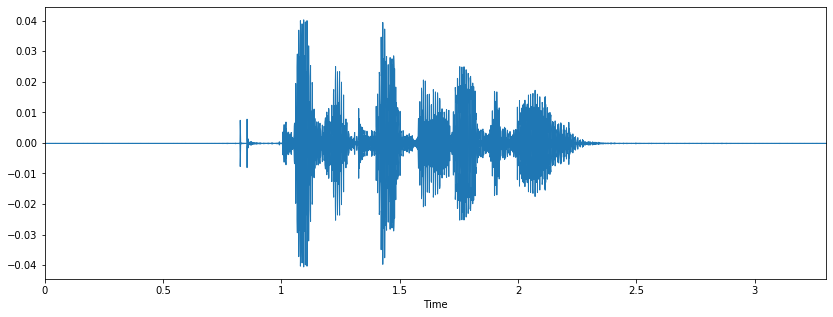

In [6]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

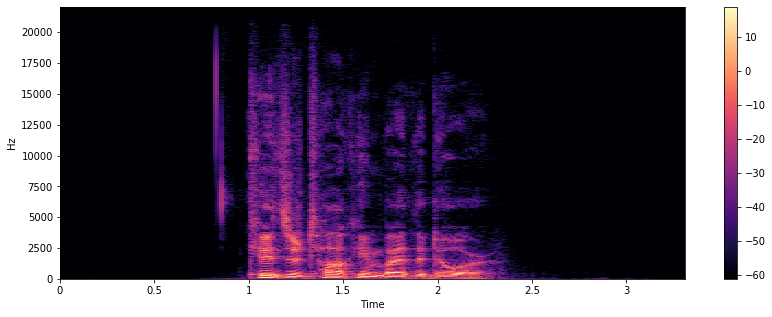

In [7]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

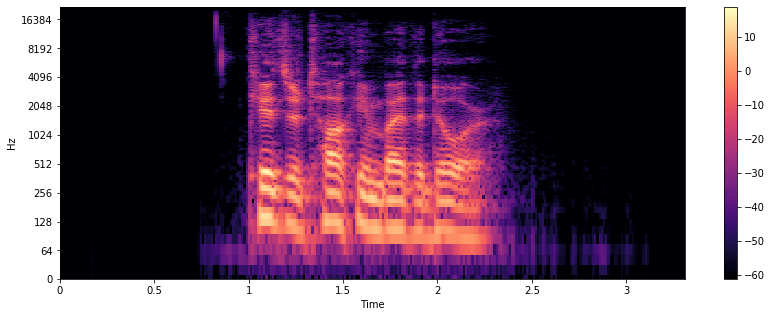

In [8]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [11]:
def label_img(emotion):
    # DIY One hot encoder
    if emotion == 'happy': return [1, 0,0,0]
    elif emotion == 'sad': return [0, 1,0,0]
    elif emotion=='angry' : return [0,0, 1,0]
    elif emotion=='neutral' : return [0,0,0,1]

In [12]:
training_data=[]
# loading the training data 
def create_train_data(): 
  try :
    for file in glob.glob("D:/thesis_codes/7_Spectrogram_2DCNN/OUT_RAV/specs/*/*.jpg"):
          # get the base name of the audio file
          basename = os.path.basename(file)
          print(basename)
          img=file
            # get the emotion label
          emotion = int2emotion[basename.split("-")[2]]
                  # we allow only AVAILABLE_EMOTIONS we set
          if emotion not in AVAILABLE_EMOTIONS:
            continue
          label = label_img(emotion) 
          
          path = os.path.join(file, img) 
          
                # loading the image from the path and then converting them into 
                # greyscale for easier covnet prob 
          img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
          
                # resizing the image for processing them in the covnet 
          img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) 
          
                # final step-forming the training data list with numpy array of the images 
          training_data.append([np.array(img), np.array(label)]) 
          
  except :
    pass
  return training_data

In [13]:
m=create_train_data()

03-01-05-01-01-01-01.wav.jpg
03-01-05-01-01-01-02.wav.jpg
03-01-05-01-01-01-03.wav.jpg
03-01-05-01-01-01-04.wav.jpg
03-01-05-01-01-01-05.wav.jpg
03-01-05-01-01-01-06.wav.jpg
03-01-05-01-01-01-07.wav.jpg
03-01-05-01-01-01-08.wav.jpg
03-01-05-01-01-01-09.wav.jpg
03-01-05-01-01-01-10.wav.jpg
03-01-05-01-01-01-11.wav.jpg
03-01-05-01-01-01-12.wav.jpg
03-01-05-01-01-01-13.wav.jpg
03-01-05-01-01-01-14.wav.jpg
03-01-05-01-01-01-15.wav.jpg
03-01-05-01-01-01-16.wav.jpg
03-01-05-01-01-01-17.wav.jpg
03-01-05-01-01-01-18.wav.jpg
03-01-05-01-01-01-19.wav.jpg
03-01-05-01-01-01-20.wav.jpg
03-01-05-01-01-01-21.wav.jpg
03-01-05-01-01-01-22.wav.jpg
03-01-05-01-01-01-23.wav.jpg
03-01-05-01-01-01-24.wav.jpg
03-01-05-01-01-02-01.wav.jpg
03-01-05-01-01-02-02.wav.jpg
03-01-05-01-01-02-03.wav.jpg
03-01-05-01-01-02-04.wav.jpg
03-01-05-01-01-02-05.wav.jpg
03-01-05-01-01-02-06.wav.jpg
03-01-05-01-01-02-07.wav.jpg
03-01-05-01-01-02-08.wav.jpg
03-01-05-01-01-02-09.wav.jpg
03-01-05-01-01-02-10.wav.jpg
03-01-05-01-01

03-02-05-02-01-01-03.wav.jpg
03-02-05-02-01-01-04.wav.jpg
03-02-05-02-01-01-05.wav.jpg
03-02-05-02-01-01-06.wav.jpg
03-02-05-02-01-01-07.wav.jpg
03-02-05-02-01-01-08.wav.jpg
03-02-05-02-01-01-09.wav.jpg
03-02-05-02-01-01-10.wav.jpg
03-02-05-02-01-01-11.wav.jpg
03-02-05-02-01-01-12.wav.jpg
03-02-05-02-01-01-13.wav.jpg
03-02-05-02-01-01-14.wav.jpg
03-02-05-02-01-01-15.wav.jpg
03-02-05-02-01-01-16.wav.jpg
03-02-05-02-01-01-17.wav.jpg
03-02-05-02-01-01-19.wav.jpg
03-02-05-02-01-01-20.wav.jpg
03-02-05-02-01-01-21.wav.jpg
03-02-05-02-01-01-22.wav.jpg
03-02-05-02-01-01-23.wav.jpg
03-02-05-02-01-01-24.wav.jpg
03-02-05-02-01-02-01.wav.jpg
03-02-05-02-01-02-02.wav.jpg
03-02-05-02-01-02-03.wav.jpg
03-02-05-02-01-02-04.wav.jpg
03-02-05-02-01-02-05.wav.jpg
03-02-05-02-01-02-06.wav.jpg
03-02-05-02-01-02-07.wav.jpg
03-02-05-02-01-02-08.wav.jpg
03-02-05-02-01-02-09.wav.jpg
03-02-05-02-01-02-10.wav.jpg
03-02-05-02-01-02-11.wav.jpg
03-02-05-02-01-02-12.wav.jpg
03-02-05-02-01-02-13.wav.jpg
03-02-05-02-01

03-01-03-01-01-01-05.wav.jpg
03-01-03-01-01-01-06.wav.jpg
03-01-03-01-01-01-07.wav.jpg
03-01-03-01-01-01-08.wav.jpg
03-01-03-01-01-01-09.wav.jpg
03-01-03-01-01-01-10.wav.jpg
03-01-03-01-01-01-11.wav.jpg
03-01-03-01-01-01-12.wav.jpg
03-01-03-01-01-01-13.wav.jpg
03-01-03-01-01-01-14.wav.jpg
03-01-03-01-01-01-15.wav.jpg
03-01-03-01-01-01-16.wav.jpg
03-01-03-01-01-01-17.wav.jpg
03-01-03-01-01-01-18.wav.jpg
03-01-03-01-01-01-19.wav.jpg
03-01-03-01-01-01-20.wav.jpg
03-01-03-01-01-01-21.wav.jpg
03-01-03-01-01-01-22.wav.jpg
03-01-03-01-01-01-23.wav.jpg
03-01-03-01-01-01-24.wav.jpg
03-01-03-01-01-02-01.wav.jpg
03-01-03-01-01-02-02.wav.jpg
03-01-03-01-01-02-03.wav.jpg
03-01-03-01-01-02-04.wav.jpg
03-01-03-01-01-02-05.wav.jpg
03-01-03-01-01-02-06.wav.jpg
03-01-03-01-01-02-07.wav.jpg
03-01-03-01-01-02-08.wav.jpg
03-01-03-01-01-02-09.wav.jpg
03-01-03-01-01-02-10.wav.jpg
03-01-03-01-01-02-11.wav.jpg
03-01-03-01-01-02-12.wav.jpg
03-01-03-01-01-02-13.wav.jpg
03-01-03-01-01-02-14.wav.jpg
03-01-03-01-01

03-02-03-02-01-01-11.wav.jpg
03-02-03-02-01-01-12.wav.jpg
03-02-03-02-01-01-13.wav.jpg
03-02-03-02-01-01-14.wav.jpg
03-02-03-02-01-01-15.wav.jpg
03-02-03-02-01-01-16.wav.jpg
03-02-03-02-01-01-17.wav.jpg
03-02-03-02-01-01-19.wav.jpg
03-02-03-02-01-01-20.wav.jpg
03-02-03-02-01-01-21.wav.jpg
03-02-03-02-01-01-22.wav.jpg
03-02-03-02-01-01-23.wav.jpg
03-02-03-02-01-01-24.wav.jpg
03-02-03-02-01-02-01.wav.jpg
03-02-03-02-01-02-02.wav.jpg
03-02-03-02-01-02-03.wav.jpg
03-02-03-02-01-02-04.wav.jpg
03-02-03-02-01-02-05.wav.jpg
03-02-03-02-01-02-06.wav.jpg
03-02-03-02-01-02-07.wav.jpg
03-02-03-02-01-02-08.wav.jpg
03-02-03-02-01-02-09.wav.jpg
03-02-03-02-01-02-10.wav.jpg
03-02-03-02-01-02-11.wav.jpg
03-02-03-02-01-02-12.wav.jpg
03-02-03-02-01-02-13.wav.jpg
03-02-03-02-01-02-14.wav.jpg
03-02-03-02-01-02-15.wav.jpg
03-02-03-02-01-02-16.wav.jpg
03-02-03-02-01-02-17.wav.jpg
03-02-03-02-01-02-19.wav.jpg
03-02-03-02-01-02-20.wav.jpg
03-02-03-02-01-02-21.wav.jpg
03-02-03-02-01-02-22.wav.jpg
03-02-03-02-01

03-01-04-01-01-01-20.wav.jpg
03-01-04-01-01-01-21.wav.jpg
03-01-04-01-01-01-22.wav.jpg
03-01-04-01-01-01-23.wav.jpg
03-01-04-01-01-01-24.wav.jpg
03-01-04-01-01-02-01.wav.jpg
03-01-04-01-01-02-02.wav.jpg
03-01-04-01-01-02-03.wav.jpg
03-01-04-01-01-02-04.wav.jpg
03-01-04-01-01-02-05.wav.jpg
03-01-04-01-01-02-06.wav.jpg
03-01-04-01-01-02-07.wav.jpg
03-01-04-01-01-02-08.wav.jpg
03-01-04-01-01-02-09.wav.jpg
03-01-04-01-01-02-10.wav.jpg
03-01-04-01-01-02-11.wav.jpg
03-01-04-01-01-02-12.wav.jpg
03-01-04-01-01-02-13.wav.jpg
03-01-04-01-01-02-14.wav.jpg
03-01-04-01-01-02-15.wav.jpg
03-01-04-01-01-02-16.wav.jpg
03-01-04-01-01-02-17.wav.jpg
03-01-04-01-01-02-18.wav.jpg
03-01-04-01-01-02-19.wav.jpg
03-01-04-01-01-02-20.wav.jpg
03-01-04-01-01-02-21.wav.jpg
03-01-04-01-01-02-22.wav.jpg
03-01-04-01-01-02-23.wav.jpg
03-01-04-01-01-02-24.wav.jpg
03-01-04-01-02-01-01.wav.jpg
03-01-04-01-02-01-02.wav.jpg
03-01-04-01-02-01-03.wav.jpg
03-01-04-01-02-01-04.wav.jpg
03-01-04-01-02-01-05.wav.jpg
03-01-04-01-02

03-02-04-02-01-02-05.wav.jpg
03-02-04-02-01-02-06.wav.jpg
03-02-04-02-01-02-07.wav.jpg
03-02-04-02-01-02-08.wav.jpg
03-02-04-02-01-02-09.wav.jpg
03-02-04-02-01-02-10.wav.jpg
03-02-04-02-01-02-11.wav.jpg
03-02-04-02-01-02-12.wav.jpg
03-02-04-02-01-02-13.wav.jpg
03-02-04-02-01-02-14.wav.jpg
03-02-04-02-01-02-15.wav.jpg
03-02-04-02-01-02-16.wav.jpg
03-02-04-02-01-02-17.wav.jpg
03-02-04-02-01-02-19.wav.jpg
03-02-04-02-01-02-20.wav.jpg
03-02-04-02-01-02-21.wav.jpg
03-02-04-02-01-02-22.wav.jpg
03-02-04-02-01-02-23.wav.jpg
03-02-04-02-01-02-24.wav.jpg
03-02-04-02-02-01-01.wav.jpg
03-02-04-02-02-01-02.wav.jpg
03-02-04-02-02-01-03.wav.jpg
03-02-04-02-02-01-04.wav.jpg
03-02-04-02-02-01-05.wav.jpg
03-02-04-02-02-01-06.wav.jpg
03-02-04-02-02-01-07.wav.jpg
03-02-04-02-02-01-08.wav.jpg
03-02-04-02-02-01-09.wav.jpg
03-02-04-02-02-01-10.wav.jpg
03-02-04-02-02-01-11.wav.jpg
03-02-04-02-02-01-12.wav.jpg
03-02-04-02-02-01-13.wav.jpg
03-02-04-02-02-01-14.wav.jpg
03-02-04-02-02-01-15.wav.jpg
03-02-04-02-02

In [14]:
t=np.array(training_data)
m

<ipython-input-14-6470aeb14450>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  t=np.array(training_data)


[[array([[ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         ...,
         [21, 28, 12, ..., 29, 28, 17],
         [21, 36, 11, ..., 29, 27, 18],
         [18, 29,  7, ..., 26, 26, 12]], dtype=uint8),
  array([0, 0, 1, 0])],
 [array([[ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         ...,
         [ 1,  6,  0, ..., 33, 39, 40],
         [ 0, 10,  0, ..., 38, 39, 41],
         [ 1, 10,  0, ..., 42, 40, 40]], dtype=uint8),
  array([0, 0, 1, 0])],
 [array([[ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         ...,
         [37, 25, 11, ..., 61, 68, 69],
         [38, 33,  4, ..., 59, 72, 69],
         [38, 29,  8, ..., 61, 70, 70]], dtype=uint8),
  array([0, 0, 1, 0])],
 [array([[ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
 

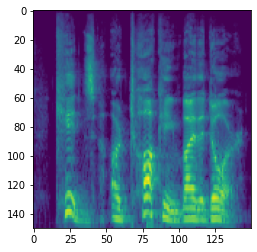

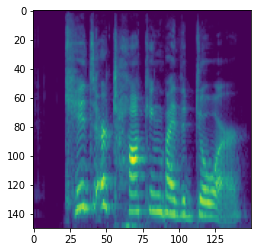

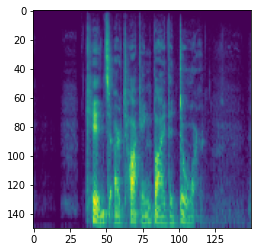

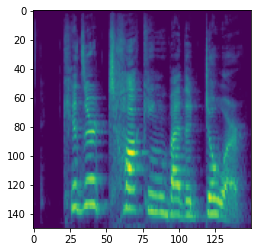

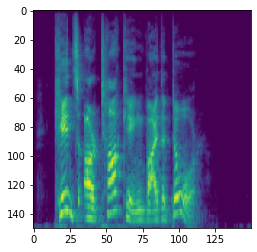

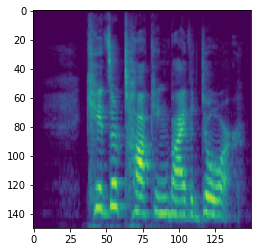

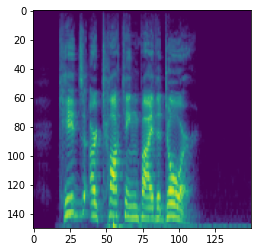

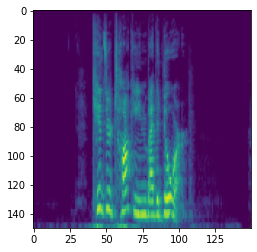

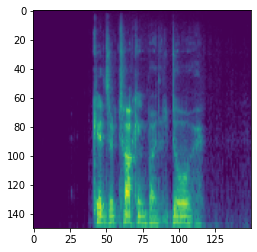

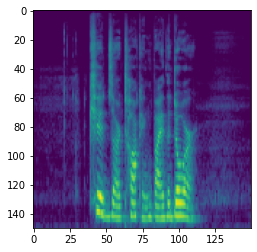

In [15]:
for img in training_data[:10] :
    plt.imshow(img[0])
    plt.show()

In [17]:
tf.compat.v1.reset_default_graph()
convnet = input_data(shape =[None, IMG_SIZE, IMG_SIZE, 1], name ='input') 
  
convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 128, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = fully_connected(convnet, 1024, activation ='relu') 
convnet = dropout(convnet, 0.8) 
  
convnet = fully_connected(convnet, 4, activation ='softmax') 
convnet = regression(convnet, optimizer ='adam', learning_rate = LR, 
      loss ='categorical_crossentropy', name ='targets') 
  
model = tflearn.DNN(convnet, tensorboard_dir ='log') 

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [18]:
X = np.array([img[0] for img in m]).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 
Y = [img[1] for img in m] 
'''Fitting the data into our model'''
#model_name='cnn_model'
# epoch = 5 taken 
#model.fit({'input': np.array(X_train)}, {'targets': y_train}, n_epoch = 10,run_id=model_name) 
#Y.shape() 

'Fitting the data into our model'

In [22]:
len(Y)

1316

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20)

In [24]:
model_name='cnn_model'
# epoch = 50 taken 
model.fit({'input': X_train}, {'targets': y_train}, n_epoch = 500,snapshot_step=300,show_metric=True,run_id=model_name)  

Training Step: 8499  | total loss: 0.11634 | time: 1.112s
| Adam | epoch: 500 | loss: 0.11634 - acc: 0.9800 -- iter: 1024/1052
Training Step: 8500  | total loss: 0.44436 | time: 1.187s
| Adam | epoch: 500 | loss: 0.44436 - acc: 0.9116 -- iter: 1052/1052
--


In [25]:
 import sklearn.metrics as  metrics
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix

In [26]:
y_pred = model.predict(X_test)
report=metrics.classification_report(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)) 
print(report)
#print(accuracy_score(y_true=Y,y_pred=y_predict))
#print(confusion_matrix(y_test, y_pred) )
matrix = metrics.confusion_matrix(np.argmax(y_test,axis=1) ,np.argmax(y_pred,axis=1))
print(matrix)
metrics.accuracy_score(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1))*100 

              precision    recall  f1-score   support

           0       0.76      0.67      0.71        70
           1       0.69      0.70      0.69        63
           2       0.79      0.83      0.81        93
           3       0.73      0.79      0.76        38

    accuracy                           0.75       264
   macro avg       0.74      0.75      0.74       264
weighted avg       0.75      0.75      0.75       264

[[47  5 14  4]
 [ 7 44  6  6]
 [ 7  8 77  1]
 [ 1  7  0 30]]


75.0

SECOND


In [27]:
tf.compat.v1.reset_default_graph()
convnet = input_data(shape =[None, IMG_SIZE, IMG_SIZE, 1], name ='input') 
  
convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation ='relu') # added_2
convnet = max_pool_2d(convnet, 5)
  
convnet = conv_2d(convnet, 128, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
convnet = dropout(convnet, 0.8)    # added
  
convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 

convnet = conv_2d(convnet, 32, 5, activation ='relu') #added_1
convnet = max_pool_2d(convnet, 5) 

convnet = fully_connected(convnet, 1024, activation ='relu') 
convnet = dropout(convnet, 0.8) 
  
convnet = fully_connected(convnet, 4, activation ='softmax') 
convnet = regression(convnet, optimizer ='rmsprop', learning_rate = LR, 
      loss ='categorical_crossentropy', name ='targets') 

m = tflearn.DNN(convnet, tensorboard_dir ='log')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [25]:
model_name='cnn'
# epoch = 50 taken 
m.fit({'input': X_train}, {'targets': y_train}, n_epoch = 500,snapshot_step=300,show_metric=True,run_id=model_name)  

Training Step: 8399  | total loss: 0.37681 | time: 0.256s
| RMSProp | epoch: 600 | loss: 0.37681 - acc: 0.9722 -- iter: 832/837
Training Step: 8400  | total loss: 0.33953 | time: 0.276s
| RMSProp | epoch: 600 | loss: 0.33953 - acc: 0.9749 -- iter: 837/837
--


In [26]:
y_pred = m.predict(X_test)
report=metrics.classification_report(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)) 
print(report)
#print(accuracy_score(y_true=Y,y_pred=y_predict))
#print(confusion_matrix(y_test, y_pred) )
matrix = metrics.confusion_matrix(np.argmax(y_test,axis=1) ,np.argmax(y_pred,axis=1))
print(matrix)
metrics.accuracy_score(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1))*100 

              precision    recall  f1-score   support

           0       0.71      0.72      0.72        54
           1       0.79      0.67      0.73        61
           2       0.78      0.93      0.85        60
           3       0.68      0.60      0.64        35

    accuracy                           0.75       210
   macro avg       0.74      0.73      0.73       210
weighted avg       0.75      0.75      0.74       210

[[39  3 11  1]
 [ 7 41  4  9]
 [ 4  0 56  0]
 [ 5  8  1 21]]


74.76190476190476

Third

In [28]:
tf.compat.v1.reset_default_graph()
convnet = input_data(shape =[None, IMG_SIZE, IMG_SIZE, 1], name ='input') 
  
convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 

  
convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 


convnet = fully_connected(convnet, 1024, activation ='relu') 
convnet = dropout(convnet, 0.8) 
  
convnet = fully_connected(convnet, 4, activation ='softmax') 
convnet = regression(convnet, optimizer ='adagrad', learning_rate = LR, 
      loss ='categorical_crossentropy', name ='targets') 

n = tflearn.DNN(convnet, tensorboard_dir ='log')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [28]:
model_name='c'
# epoch = 50 taken 
n.fit({'input': X_train}, {'targets': y_train}, n_epoch = 500,snapshot_step=300,show_metric=True,run_id=model_name)  

Training Step: 6999  | total loss: 0.14072 | time: 0.226s
| AdaGrad | epoch: 500 | loss: 0.14072 - acc: 0.9810 -- iter: 832/837
Training Step: 7000  | total loss: 0.13044 | time: 0.244s
| AdaGrad | epoch: 500 | loss: 0.13044 - acc: 0.9829 -- iter: 837/837
--


In [29]:
y_pred = n.predict(X_test)
report=metrics.classification_report(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)) 
print(report)
#print(accuracy_score(y_true=Y,y_pred=y_predict))
#print(confusion_matrix(y_test, y_pred) )
matrix = metrics.confusion_matrix(np.argmax(y_test,axis=1) ,np.argmax(y_pred,axis=1))
print(matrix)
metrics.accuracy_score(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1))*100 

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        54
           1       0.75      0.80      0.78        61
           2       0.92      0.78      0.85        60
           3       0.60      0.69      0.64        35

    accuracy                           0.76       210
   macro avg       0.75      0.75      0.75       210
weighted avg       0.77      0.76      0.77       210

[[40  4  4  6]
 [ 6 49  0  6]
 [ 8  1 47  4]
 [ 0 11  0 24]]


76.19047619047619

Fourth

In [29]:
LR1=0.005
tf.compat.v1.reset_default_graph()
convnet = input_data(shape =[None, IMG_SIZE, IMG_SIZE, 1], name ='input') 
  
convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 

  
convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 


convnet = fully_connected(convnet, 1024, activation ='relu') 
convnet = dropout(convnet, 0.8) 
  
convnet = fully_connected(convnet, 4, activation ='softmax') 
convnet = regression(convnet, optimizer ='adagrad', learning_rate = LR1, 
      loss ='categorical_crossentropy', name ='targets') 

o = tflearn.DNN(convnet, tensorboard_dir ='log')

In [30]:
model_name='cn'
# epoch = 50 taken 
o.fit({'input': X_train}, {'targets': y_train}, n_epoch = 500,snapshot_step=300,show_metric=True,run_id=model_name)  

Training Step: 8499  | total loss: 0.09421 | time: 1.126s
| AdaGrad | epoch: 500 | loss: 0.09421 - acc: 0.9869 -- iter: 1024/1052
Training Step: 8500  | total loss: 0.53354 | time: 1.200s
| AdaGrad | epoch: 500 | loss: 0.53354 - acc: 0.9210 -- iter: 1052/1052
--


In [31]:
y_pred = o.predict(X_test)
report=metrics.classification_report(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)) 
print(report)
#print(accuracy_score(y_true=Y,y_pred=y_predict))
#print(confusion_matrix(y_test, y_pred) )
matrix = metrics.confusion_matrix(np.argmax(y_test,axis=1) ,np.argmax(y_pred,axis=1))
print(matrix)
metrics.accuracy_score(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1))*100 

              precision    recall  f1-score   support

           0       0.70      0.81      0.75        70
           1       0.70      0.76      0.73        63
           2       0.91      0.84      0.87        93
           3       0.93      0.68      0.79        38

    accuracy                           0.79       264
   macro avg       0.81      0.77      0.79       264
weighted avg       0.81      0.79      0.79       264

[[57  5  7  1]
 [13 48  1  1]
 [ 7  8 78  0]
 [ 4  8  0 26]]


79.16666666666666

In [61]:
y_pred = o.predict(X_test)
report=metrics.classification_report(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)) 
print(report)
#print(accuracy_score(y_true=Y,y_pred=y_predict))
#print(confusion_matrix(y_test, y_pred) )
matrix = metrics.confusion_matrix(np.argmax(y_test,axis=1) ,np.argmax(y_pred,axis=1))
print(matrix)
metrics.accuracy_score(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1))*100 

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        54
           1       0.80      0.84      0.82        61
           2       0.87      0.80      0.83        60
           3       0.71      0.63      0.67        35

    accuracy                           0.80       210
   macro avg       0.79      0.78      0.78       210
weighted avg       0.80      0.80      0.79       210

[[46  1  5  2]
 [ 2 51  1  7]
 [10  2 48  0]
 [ 2 10  1 22]]


79.52380952380952

Fifth

In [33]:
LR1=5e-05
tf.compat.v1.reset_default_graph()
convnet = input_data(shape =[None, IMG_SIZE, IMG_SIZE, 1], name ='input') 
  
convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 

  
convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 


convnet = fully_connected(convnet, 1024, activation ='relu') 
convnet = dropout(convnet, 0.8) 
  
convnet = fully_connected(convnet, 4, activation ='softmax') 
convnet = regression(convnet, optimizer ='adam', learning_rate = LR1, 
      loss ='categorical_crossentropy', name ='targets') 

p = tflearn.DNN(convnet, tensorboard_dir ='log')

In [ ]:
#AGAIN

In [34]:
model_name='cp'
# epoch = 50 taken 
p.fit({'input': X_train}, {'targets': y_train}, n_epoch = 500,snapshot_step=300,show_metric=True,run_id=model_name)  

Training Step: 8499  | total loss: 0.10277 | time: 1.135s
| Adam | epoch: 500 | loss: 0.10277 - acc: 0.9877 -- iter: 1024/1052
Training Step: 8500  | total loss: 0.59307 | time: 1.212s
| Adam | epoch: 500 | loss: 0.59307 - acc: 0.9186 -- iter: 1052/1052
--


In [35]:
y_pred = p.predict(X_test)
report=metrics.classification_report(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)) 
print(report)
#print(accuracy_score(y_true=Y,y_pred=y_predict))
#print(confusion_matrix(y_test, y_pred) )
matrix = metrics.confusion_matrix(np.argmax(y_test,axis=1) ,np.argmax(y_pred,axis=1))
print(matrix)
metrics.accuracy_score(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1))*100 

              precision    recall  f1-score   support

           0       0.74      0.81      0.78        70
           1       0.82      0.67      0.74        63
           2       0.85      0.90      0.88        93
           3       0.78      0.76      0.77        38

    accuracy                           0.80       264
   macro avg       0.80      0.79      0.79       264
weighted avg       0.80      0.80      0.80       264

[[57  2 11  0]
 [10 42  3  8]
 [ 5  4 84  0]
 [ 5  3  1 29]]


80.3030303030303

In [ ]:
#_______________________________________________________
#FINAL

In [88]:
model_name='cp'
# epoch = 50 taken 
p.fit({'input': X_train}, {'targets': y_train}, n_epoch = 500,snapshot_step=300,show_metric=True,run_id=model_name)  

Training Step: 6999  | total loss: 0.00383 | time: 0.227s
| Adam | epoch: 500 | loss: 0.00383 - acc: 0.9997 -- iter: 832/837
Training Step: 7000  | total loss: 0.00348 | time: 0.246s
| Adam | epoch: 500 | loss: 0.00348 - acc: 0.9997 -- iter: 837/837
--


In [89]:
y_pred = p.predict(X_test)
report=metrics.classification_report(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)) 
print(report)
#print(accuracy_score(y_true=Y,y_pred=y_predict))
#print(confusion_matrix(y_test, y_pred) )
matrix = metrics.confusion_matrix(np.argmax(y_test,axis=1) ,np.argmax(y_pred,axis=1))
print(matrix)
metrics.accuracy_score(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1))*100 

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        54
           1       0.85      0.85      0.85        61
           2       0.84      0.87      0.85        60
           3       0.70      0.74      0.72        35

    accuracy                           0.82       210
   macro avg       0.81      0.81      0.81       210
weighted avg       0.82      0.82      0.82       210

[[42  1  7  4]
 [ 1 52  2  6]
 [ 7  0 52  1]
 [ 0  8  1 26]]


81.9047619047619